# Example of Project Sudoku

This notebook contains two similar examples on how the source code in this project can be used to solve Sudoku boards by just using an image of a Sudoku. First, a more explanatory example is given with plenty of comments explaining what is happening. The first example also uses an image of a Sudoku printed on paper. The second example uses an image of a Sudoku taken on a computer screen.

Please see https://github.com/EmpanS/Project-Sudoku and especially \docs, where additional examples is given. These examples are not about the functionality (like these ones), but about the solutions to some problems that were encountered. Those examples explains different parts of the source code, more or less thoroughly.

In [ ]:
# Install useful dependencies
!pip3 install numpy==1.16.4 # Using this version to omit ugly output because of the interaction between numpy and tf
!pip3 install --upgrade matplotlib
!pip3 install --upgrade opencv-python
!pip3 install --upgrade scikit-image
!pip3 install --upgrade keras
!pip3 install --upgrade tensorflow

### Example 1 - Image of a Sudoku board printed on paper

Using TensorFlow backend.


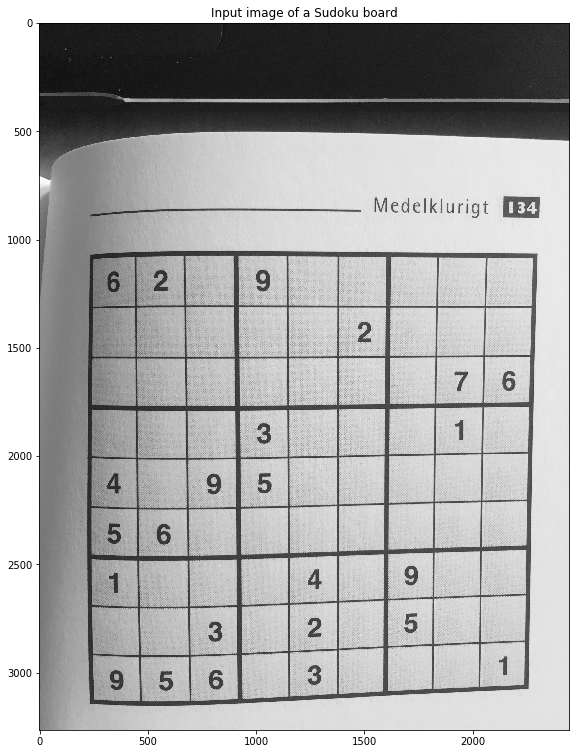

In [1]:
# Importing useful libraries
import os
import sys
# Appending the project-folder to path
sys.path.append("../project")
from keras.models import load_model
from SudokuSolver import SudokuSolver
from Preprocess import *
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

MNIST_DIMENSION = (28, 28)
BASE_PATH = os.getcwd()
image_path = BASE_PATH + "\example_1.jpg"
# Import Keras model
model = load_model("../Project\Final_model")

# Load image of Sudoku board and visualize
sudoku_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.rcParams['figure.figsize'] = [13, 13]
plt.imshow(sudoku_img, cmap='gray')
plt.title("Input image of a Sudoku board")
plt.show()

The list processed_sudoku_img contains 81 items.



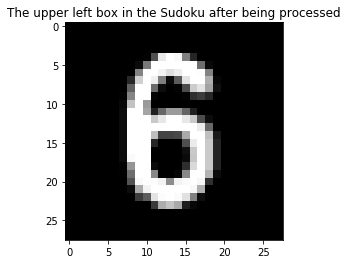

In [2]:
# Now we resize to the image 1200x900 and process it
resized_sudoku_img = cv2.resize(sudoku_img, (1200, 900), interpolation=cv2.INTER_AREA)
processed_sudoku_img = preprocess_sudoku_board(resized_sudoku_img.copy(), MNIST_DIMENSION)
# processed_sudoku_img is a list of tuples, where the second object in the tuple is a boolean describing whether the 
# corresponding box contains a number. If a number is present the first object is an image of the centered number, otherwise 
# the first object is just a black image.
print("The list processed_sudoku_img contains {} items.\n".format(len(processed_sudoku_img)))

# Visualize one number
plt.imshow(processed_sudoku_img[0][0], cmap='gray')
plt.title("The upper left box in the Sudoku after being processed")
plt.show()

Printing the Sudoku board...
 -------------------------
 | 6 2   | 9     |       |
 |       |     2 |       |
 |       |       |   7 6 |
 -------------------------
 |       | 3     |   1   |
 | 4   9 | 5     |       |
 | 5 6   |       |       |
 -------------------------
 | 1     |   4   | 9     |
 |     3 |   2   | 5     |
 | 9 5 6 |   3   |     1 |
 -------------------------


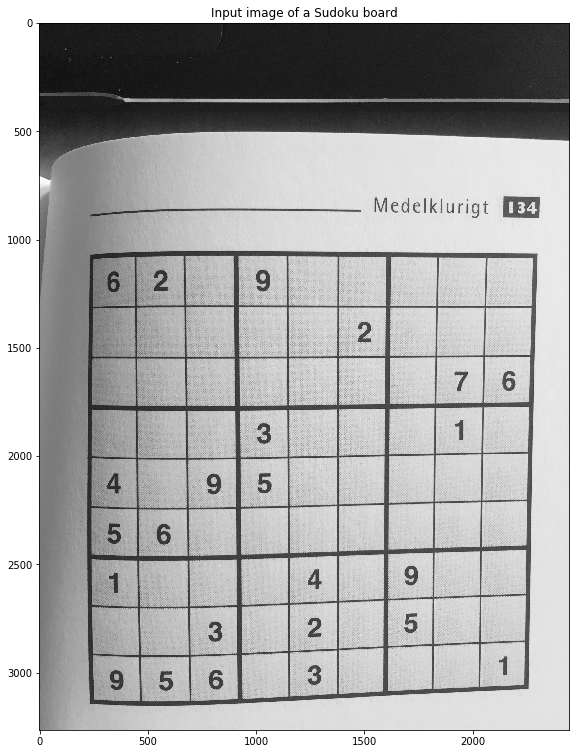

In [3]:
# We create an empty numpy array where we will save the numbers
sudoku_board = np.zeros((9, 9), dtype=np.int8)

for index, tuple_ in enumerate(processed_sudoku_img):
    if tuple_[1]:
        # The corresponding box in the Sudoku image contains a number
        # Normalize number
        number = tuple_[0] / 255
        number = np.reshape(number, newshape=(1, 28, 28, 1))
        # Use the trained Keras-model to predict the number
        prediction = model.predict(number)[0]
        sudoku_board[int(index / 9)][index % 9] = int(np.argmax(prediction)) + 1
    else:
        sudoku_board[int(index / 9)][index % 9] = -1

# We use the in-built method in SudokuSolver() to visualize the Sudoku board in the numpy array
SudokuSolver().print_board(sudoku_board)

# We can compare it with the original image
sudoku_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.rcParams['figure.figsize'] = [13, 13]
plt.imshow(sudoku_img, cmap='gray')
plt.title("Input image of a Sudoku board")
plt.show()

In [4]:
# We then use SudokuSolver() to solve the Sudoku board
solved_sudoku = SudokuSolver().solve(sudoku_board)[0]
# We print the solution
SudokuSolver().print_board(solved_sudoku)

Found a solution after 170523 number of insertions.
Printing the Sudoku board...
 -------------------------
 | 6 2 8 | 9 7 3 | 1 5 4 |
 | 7 1 5 | 4 6 2 | 8 9 3 |
 | 3 9 4 | 8 5 1 | 2 7 6 |
 -------------------------
 | 2 8 7 | 3 9 4 | 6 1 5 |
 | 4 3 9 | 5 1 6 | 7 8 2 |
 | 5 6 1 | 2 8 7 | 3 4 9 |
 -------------------------
 | 1 7 2 | 6 4 5 | 9 3 8 |
 | 8 4 3 | 1 2 9 | 5 6 7 |
 | 9 5 6 | 7 3 8 | 4 2 1 |
 -------------------------


### Example 2 - Image of a Sudoku board taken on a computer screen

Printing the Sudoku board...
 -------------------------
 |   4   | 2   1 |   6   |
 |       |       |       |
 | 9   5 |       | 3   7 |
 -------------------------
 |       |       |       |
 | 5   7 |   8   | 1   4 |
 |   1   |       |   9   |
 -------------------------
 |     1 |       | 6     |
 |       | 7   5 |       |
 | 6   8 | 9   4 | 5   3 |
 -------------------------


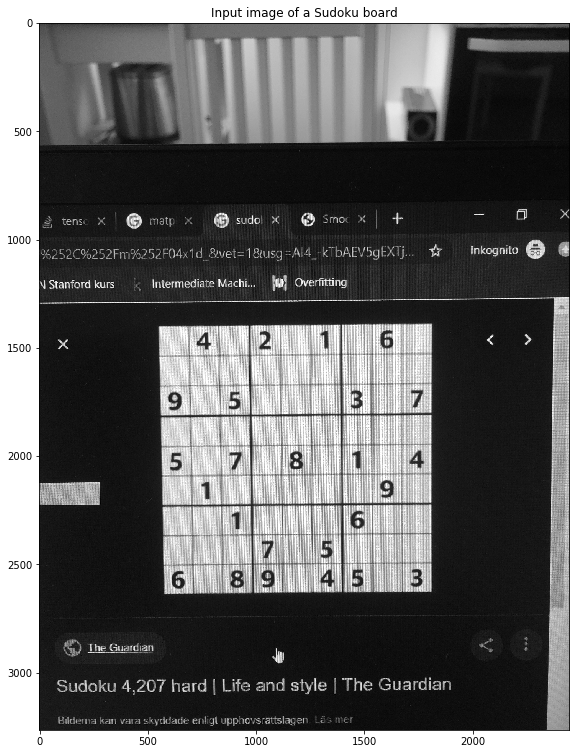

Found a solution after 64257 number of insertions.
Printing the Sudoku board...
 -------------------------
 | 7 4 3 | 2 9 1 | 8 6 5 |
 | 1 8 6 | 5 3 7 | 9 4 2 |
 | 9 2 5 | 8 4 6 | 3 1 7 |
 -------------------------
 | 3 6 4 | 1 7 9 | 2 5 8 |
 | 5 9 7 | 6 8 2 | 1 3 4 |
 | 8 1 2 | 4 5 3 | 7 9 6 |
 -------------------------
 | 4 5 1 | 3 2 8 | 6 7 9 |
 | 2 3 9 | 7 6 5 | 4 8 1 |
 | 6 7 8 | 9 1 4 | 5 2 3 |
 -------------------------


In [5]:
# Lets try it on another image taken on a computer screen
image_path = BASE_PATH + "\example_2.jpg"
sudoku_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_sudoku_img = cv2.resize(sudoku_img, (1200, 900), interpolation=cv2.INTER_AREA)
processed_sudoku_img = preprocess_sudoku_board(resized_sudoku_img.copy(), MNIST_DIMENSION)
sudoku_board = np.zeros((9, 9), dtype=np.int8)
for index, tuple_ in enumerate(processed_sudoku_img):
    if tuple_[1]:
        number = tuple_[0] / 255
        number = np.reshape(number, newshape=(1, 28, 28, 1))
        
        prediction = model.predict(number)[0]
        sudoku_board[int(index / 9)][index % 9] = int(np.argmax(prediction)) + 1
    else:
        sudoku_board[int(index / 9)][index % 9] = -1

# We compare the resulting Sudoku board after it have gone through the data pipeline with the input image
SudokuSolver().print_board(sudoku_board)
sudoku_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.rcParams['figure.figsize'] = [13, 13]
plt.imshow(sudoku_img, cmap='gray')
plt.title("Input image of a Sudoku board")
plt.show()

solved_sudoku = SudokuSolver().solve(sudoku_board)[0]
SudokuSolver().print_board(solved_sudoku)